In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\27th Nov - Stats and ML Batch\\DataSet'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)
#pd.set_option('display.width',None)

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset = dataset.drop(['RowNumber','CustomerId','Surname'], axis=1)
dataset.head()                        

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check duplicate customer 
dataset.duplicated().sum()

0

In [5]:
# check missing data
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
# check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Encoding

In [8]:
#dataset['Geography'].value_counts()

In [9]:
#One hot encoder
dataset = pd.get_dummies(dataset, columns=['Geography'])

In [10]:
# dummy variables
dataset  = dataset.drop(['Geography_France'], axis=1)

In [11]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [13]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [89]:
# splitting the data into independent and dependent variable
x = dataset.drop(['Exited'], axis=1).values
y = dataset['Exited'].values

In [90]:
x

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [91]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [92]:
print(x.shape, y.shape)

(10000, 11) (10000,)


In [73]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10
0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0
1,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0
2,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0
3,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0
4,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0


In [18]:
#y.value_counts()

In [19]:
2037/10000*100

20.369999999999997

In [22]:
# imbalance treatment required however we use stratify to balance training and test dataset
"""
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print(y_smote.value_counts())
"""

'\nimport imblearn\nfrom imblearn.over_sampling import SMOTE\nsmote= SMOTE()\nx_smote, y_smote = smote.fit_resample(x,y)\nprint(y.value_counts())\nprint(y_smote.value_counts())\n'

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [24]:
# data leakage problem - 
## 1) if we have train and test data seperately, we have to handle missing data, feature scaling, outlier treatment seperetly

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<AxesSubplot:>

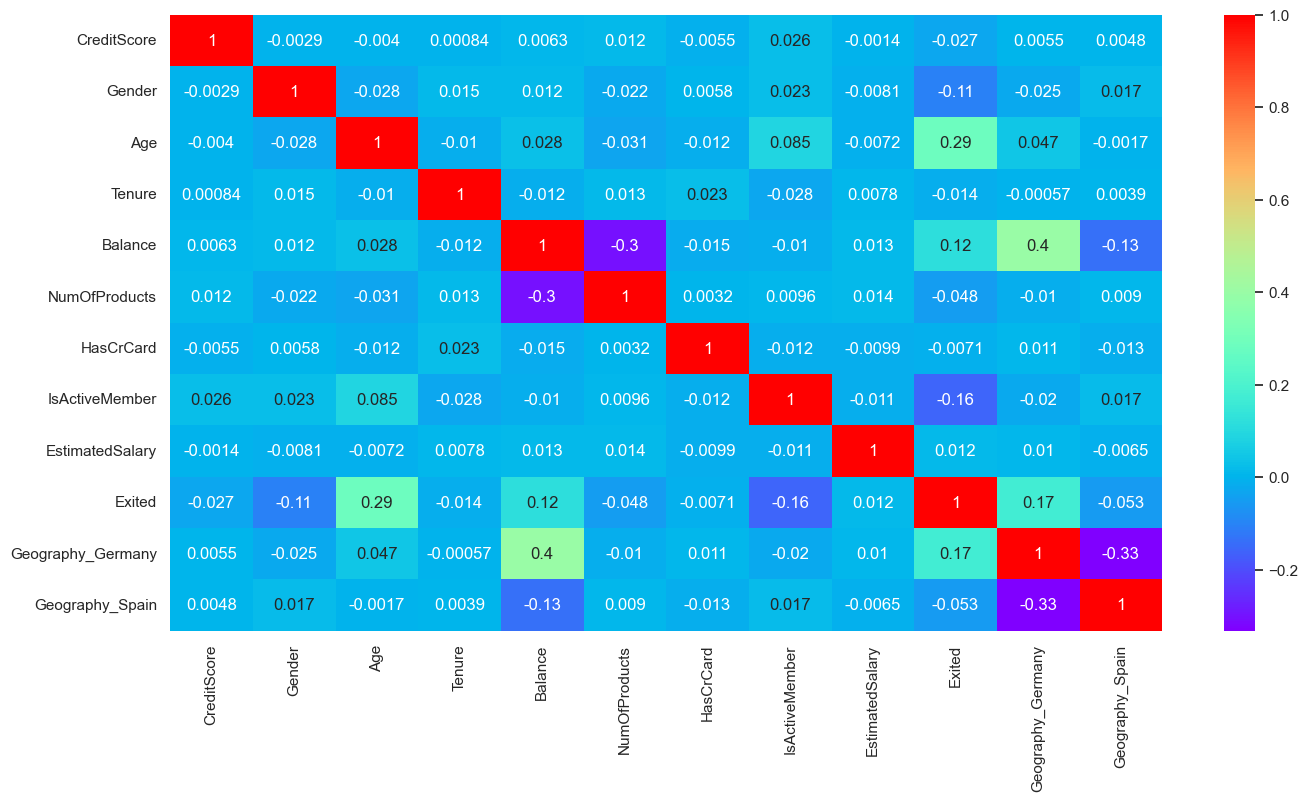

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

In [ ]:
import dtale
dtale.show(dataset)

<AxesSubplot:xlabel='0'>

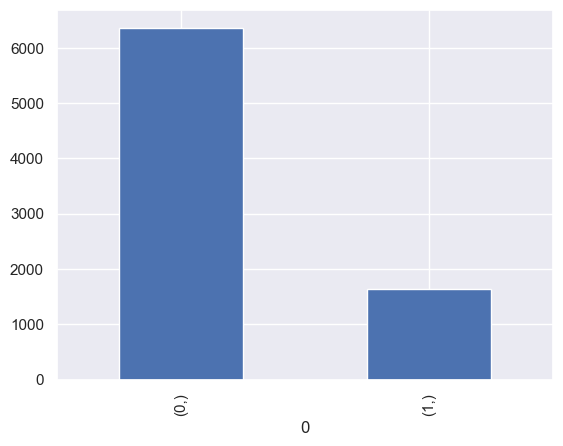

In [26]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

In [27]:
pd.DataFrame(y_test).value_counts()

0    1593
1     407
dtype: int64

In [28]:
407/(407+1593)*100

20.349999999999998

KeyError: "None of [Float64Index([619.0, 0.0, 42.0, 2.0, 0.0, 1.0, 1.0, 1.0, 101348.88, 0.0, 0.0], dtype='float64')] are in the [columns]"

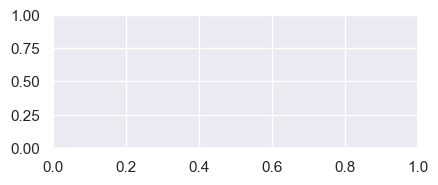

In [29]:
def draw_histogram(dataset, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16,10))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name + "Distribution")
    fig.tight_layout()
    plt.show()
    
draw_histogram(dataset, x,5,3)

# Model Building

## Model 1 : AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [31]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))

[[6094  276]
 [ 836  794]]

[[1524   69]
 [ 233  174]]


In [34]:
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.74      0.49      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.81      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



In [35]:
print(accuracy_score(y_train, y_pred_train_ada))
print()
print(accuracy_score(y_test, y_pred_test_ada))

0.861

0.849


# Model 2 - Gradient Boosting Algorithm

In [36]:
from sklearn.ensemble import GradientBoostingClassifier 
# from sklearn.ensemble import GradientBoostingRegressor - regression problem

gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_train)

GradientBoostingClassifier()

In [37]:
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)

In [38]:
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6370
           1       0.81      0.50      0.62      1630

    accuracy                           0.87      8000
   macro avg       0.85      0.74      0.77      8000
weighted avg       0.87      0.87      0.86      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [39]:
print(accuracy_score(y_train, y_pred_train_gdm))
print()
print(accuracy_score(y_test, y_pred_test_gdm))

0.87475

0.8575


# Model 3 - XGBoost Classification

In [40]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [41]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [42]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6370
           1       0.97      0.83      0.89      1630

    accuracy                           0.96      8000
   macro avg       0.96      0.91      0.93      8000
weighted avg       0.96      0.96      0.96      8000


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.69      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [43]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

0.959625

0.85


In [44]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())

0.8567500000000001


# Model 4 - Bagging Classifier

In [45]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [46]:
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)

In [47]:
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6370
           1       0.99      0.93      0.96      1630

    accuracy                           0.98      8000
   macro avg       0.99      0.96      0.97      8000
weighted avg       0.98      0.98      0.98      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [48]:
print(accuracy_score(y_train, y_pred_train_bagging))
print()
print(accuracy_score(y_test, y_pred_test_bagging))

0.983125

0.8535


# Model 5 - RandomForest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)

In [51]:
print(classification_report(y_train, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [52]:
print(accuracy_score(y_train, y_pred_train_rfm))
print()
print(accuracy_score(y_test, y_pred_test_rfm))

1.0

0.863


In [53]:
# Please note, boosting is for handling high bias problem and bagging for high variance problem

# Model 6 - K-Nearest Neighbors (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
y_train

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

In [57]:
error_rate

[0.211,
 0.1755,
 0.1785,
 0.167,
 0.177,
 0.167,
 0.167,
 0.163,
 0.161,
 0.167,
 0.164,
 0.169,
 0.164,
 0.169,
 0.1615,
 0.1675,
 0.165,
 0.163,
 0.1635,
 0.165,
 0.1635,
 0.1655,
 0.163,
 0.167,
 0.163,
 0.1655,
 0.1615,
 0.169,
 0.164]

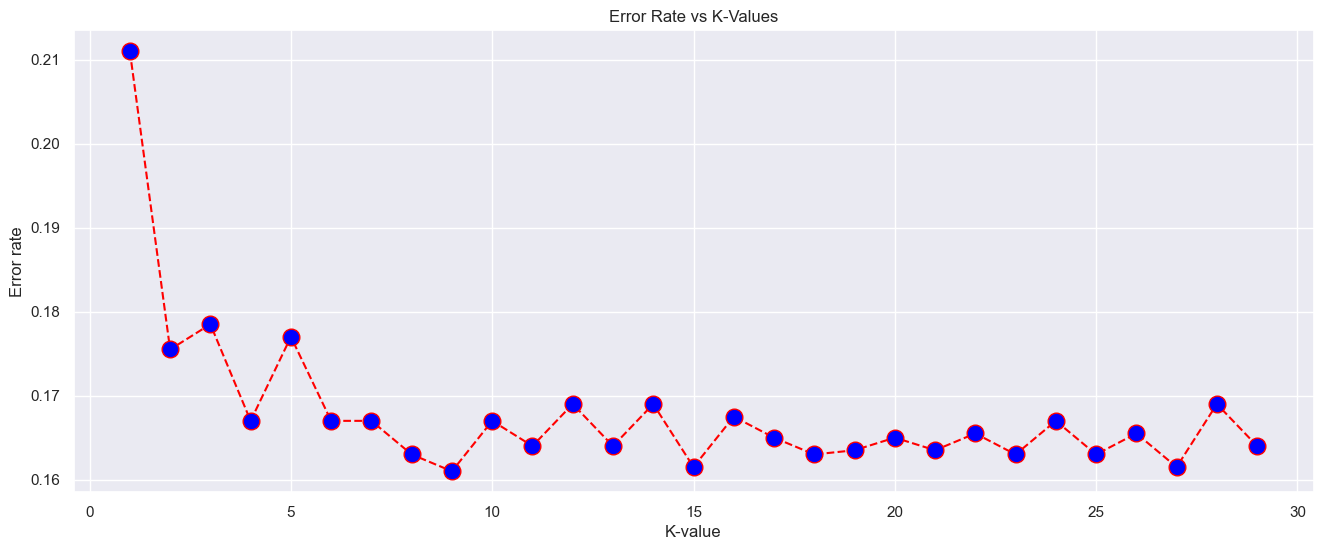

In [58]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30), error_rate, color='red', linestyle='dashed', marker='o', markersize=12,
        markerfacecolor='blue')
plt.title("Error Rate vs K-Values")
plt.xlabel("K-value")
plt.ylabel("Error rate")
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [60]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [61]:
print(classification_report(y_train, y_pred_train_knn))
print()
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6370
           1       0.80      0.32      0.45      1630

    accuracy                           0.84      8000
   macro avg       0.82      0.65      0.68      8000
weighted avg       0.84      0.84      0.82      8000


              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1593
           1       0.76      0.29      0.42       407

    accuracy                           0.84      2000
   macro avg       0.80      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000



In [62]:
print(accuracy_score(y_train, y_pred_train_knn))
print()
print(accuracy_score(y_test, y_pred_test_knn))

0.84425

0.8365


# Voting Classifier

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [121]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = KNeighborsClassifier()
clf6 = BaggingClassifier()
clf7 = GradientBoostingClassifier()
clf8 = XGBClassifier()

In [94]:
estimators = [('lr', clf1),('dt',clf2),('rf', clf3),('ada', clf4),('knn', clf5),('bagg', clf6),
             ('grd',clf7),('xgb', clf8)]

In [122]:
estimators = [('lr', clf1),('dt',clf2),('rf', clf3),('ada', clf4)]

In [123]:
estimators

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('rf', RandomForestClassifier()),
 ('ada', AdaBoostClassifier())]

In [114]:
y.shape

(10000,)

In [115]:
x.shape

(10000, 11)

In [124]:
for i in estimators:
    r = cross_val_score(i[1], x,y, cv=10, scoring='accuracy')
    print(i[0], np.round(np.mean(r),2))

lr 0.79
dt 0.79
rf 0.86
ada 0.86


In [108]:
print(estimators)

('ada', AdaBoostClassifier())


In [104]:
y.shape

(10000,)

In [125]:
from sklearn.ensemble import VotingClassifier

In [126]:
vc = VotingClassifier(estimators = estimators, voting='hard')
abc = cross_val_score(vc, x, y, cv=10, scoring='accuracy')

In [128]:
print(np.round(np.mean(abc),2))

0.85


# Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [129]:
from sklearn.ensemble import StackingClassifier

In [131]:
estimators = [
    ('rf',RandomForestClassifier()),
    ('logit',LogisticRegression()),
    ('dtree',DecisionTreeClassifier()),
    ('Bagging', BaggingClassifier())
    
]

In [132]:
clf = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression(),
                        cv=10)

In [133]:
clf

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('Bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [134]:
clf.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('Bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [135]:
y_pred_train_clf = clf.predict(x_train)
y_pred_test_clf = clf.predict(x_test)

In [136]:
print(accuracy_score(y_train, y_pred_train_clf))
print()
print(accuracy_score(y_test, y_pred_test_clf))

0.99975

0.8635


In [137]:
train_acc = cross_val_score(clf, x_train, y_train, cv=10)
train_acc.mean()

0.8605

In [ ]:
# In Time Series Forecasting, before we build the model, we have to check durbin_watson_test
